In [40]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.quantum_info import Statevector,random_statevector
from qiskit.visualization import plot_histogram,plot_bloch_multivector,plot_state_qsphere
import numpy as np

In [41]:
simulator='ibmq_qasm_simulator'

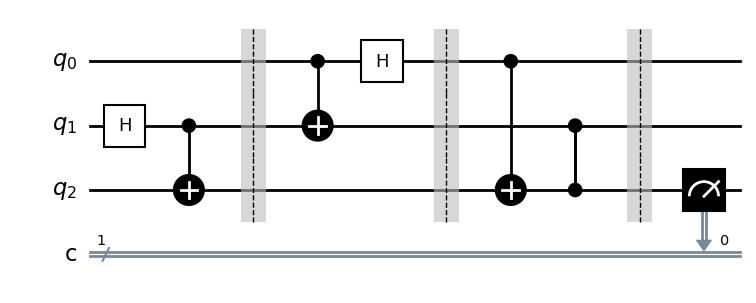

In [42]:
qc=QuantumCircuit(3,1)

qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.cx(0,2)
qc.cz(1,2)
qc.barrier()
qc.measure(2,0)

qc.draw(output='mpl',style='bw')

In [43]:
def execute(qc,simulator):
    provider=QiskitRuntimeService()
    backend=provider.get_backend(simulator)
    job=backend.run(transpile(qc,backend),shots=1024)
    result=job.result()
    return result.get_counts()

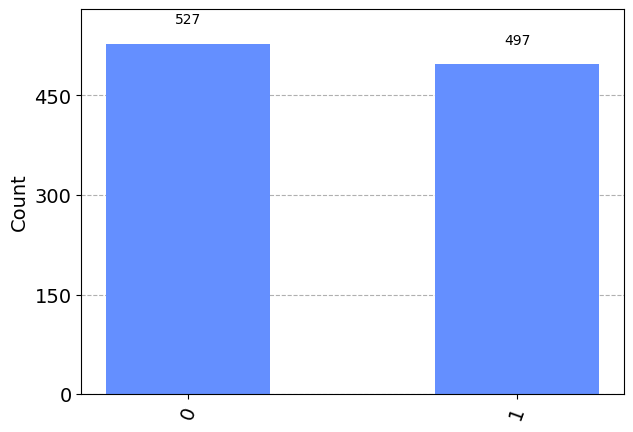

In [44]:
plot_histogram(execute(qc,simulator))